# CNN for Image Classification

In this lab, you are given a dataset containing 6,000 pictures of cats and dogs (3,000 cats, 3,000 dogs) and asked to train a classifier built upon Convolutional Neural Networks (ConvNets) to classify images as "dogs" or "cats".

In [2]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

import keras
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import random

Using TensorFlow backend.


### Exercise 1 
Split the dataset by selecting 4,800 pictures for training, 600 for validation, and 600 for testing.

In [36]:
img_width = 50
img_height = 50
num_classes = 2
DATA_DIR = './data/'
image_filenames = [DATA_DIR+i for i in os.listdir(DATA_DIR)] # use this for full dataset
# Split the data in three sets, 80% for training, 10% for validation and 10% for testing
# make sure that the image filenames have a fixed order before shuffling
# Add your code here

random.shuffle(image_filenames)
x, y=[],[]

#append each image file to x and each label to y
for img in image_filenames:
    #reading image into array and then resize it to 50x50 #OPT: interpolation=INTER_AREA
    x.append(cv2.resize(cv2.imread(img),(img_height, img_width)))
    #use file name to detect label and appaend it to y
    if 'cat' in img:
        y.append(0)
    else:
        y.append(1)

#split the dats into trait, test and validation
x_train,x_test,x_valid=x[0:4800],x[4800:5400],x[5400:6000]
y_train,y_test,y_valid=y[0:4800],y[4800:5400],y[5400:6000]


### Exercise 2
Train a Convolutional Neural Network (ConvNet) on the training set. The general structure of the ConvNet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. A Conv2D layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. A MaxPooling2D layer is used to downscale input in both the vertical and horizontal dimensions.

In [10]:
# Add your code here
batch=16
epochs=10

model =Sequential()
#add a convolutional layer with 15 4x4 filters and a relu activation 
model.add(Conv2D(15,(3,3), input_shape=(img_height,img_width,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#add a feedforeward layer with 25 neurons and a relu
model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
#at the output layer is a sigmoid funtion 
model.add(Activation('sigmoid'))
#compile the model with abinary coress entropy loss functiona nd rms prop optimizer
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

#create the data generator objects  for training and validation data
Gen=ImageDataGenerator(rescale=1./255,rotation_range=40, fill_mode='nearest')
trainGen=Gen.flow(np.array(x_train), y_train, batch_size=batch, shuffle=False)
validGen=Gen.flow(np.array(x_valid), y_valid, batch_size=batch, shuffle=False)

#fit mdoel
history = model.fit_generator(trainGen, steps_per_epoch=4800//batch, epochs=epochs,
    validation_data=validGen, validation_steps=600//batch )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 15)        420       
_________________________________________________________________
activation_4 (Activation)    (None, 48, 48, 15)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 15)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8640)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                216025    
_________________________________________________________________
activation_5 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
__________

### Exercise 3

Output the training/validation loss and accuracy curves. Also print the classification results (e.g., classification accuracy, confusion matrix, precision-recall curves and/or ROC curves) on the test set.

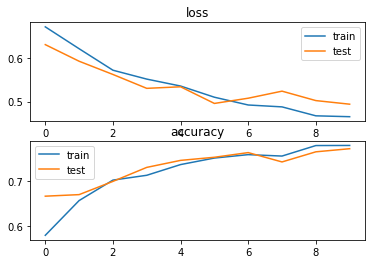

              precision    recall  f1-score   support

           0       0.80      0.32      0.45       281
           1       0.61      0.93      0.74       319

   micro avg       0.64      0.64      0.64       600
   macro avg       0.70      0.62      0.59       600
weighted avg       0.70      0.64      0.60       600

[[ 89 192]
 [ 22 297]]
0.6433333333333333


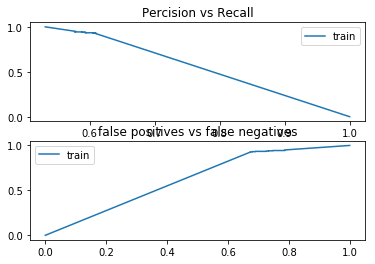

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve

# Add your code here

#plot the training and validation loss curves
plt.subplot(2, 1, 1)
plt.title('loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

#plot the training and validation accuracy curves
plt.subplot(2, 1, 2)
plt.title('accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

#saving the prediction probabilities in pred_train_y and pred_valid_Y
pred_test_y=model.predict(np.array(x_test), batch_size=batch)

#outputing the classification report, accuracy and the confusion matrix of the training dataset
print(classification_report(y_test,pred_test_y.round()))
print(confusion_matrix(y_test,pred_test_y.round()))
print(accuracy_score(y_test,pred_test_y.round()))

#find the percision, true positive rates, and false negative rates
p,r,_=precision_recall_curve(y_test,pred_test_y)
fpr, tpr, _=roc_curve(y_test,pred_test_y)

#plot the pervision vs recall
plt.figure()
plt.subplot(2, 1, 1)
plt.title('Percision vs Recall')
plt.plot(p,r, label='train')
plt.legend()

#plot the false positive rate vs true positive rate
plt.subplot(2, 1, 2)
plt.title('false positives vs false negatives')
plt.plot(fpr, tpr, label='train')
plt.legend()
plt.show()


### Exercise 4

Explore different network architectures (e.g., stacking 4 Conv2D+MaxPooling2D layers) and various ways in tuning the model parameters to see if you can improve the model performance on the validation set.

In [ ]:
# Add your code here
batch=16
epochs=10

#stack 3 conv layers, the first without a pooling layer
model = Sequential()
model.add(Conv2D(20,(3,3), input_shape=(img_height,img_width,3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(24, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())

#add a feedforeward layer with 16 neurons 
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Gen=ImageDataGenerator(rescale=1./255,rotation_range=40, fill_mode='nearest')
trainGen=Gen.flow(np.array(x_train), y_train, batch_size=batch, shuffle=False)
validGen=Gen.flow(np.array(x_valid), y_valid, batch_size=batch, shuffle=False)

history = model.fit_generator(
    trainGen, 
    steps_per_epoch=4800//batch,
    epochs=epochs,
    validation_data=validGen,
    validation_steps=600//batch
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 48, 48, 20)        560       
_________________________________________________________________
activation_147 (Activation)  (None, 48, 48, 20)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 46, 46, 24)        4344      
_________________________________________________________________
activation_148 (Activation)  (None, 46, 46, 24)        0         
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 23, 23, 24)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 21, 21, 32)        6944      
_________________________________________________________________
activation_149 (Activation)  (None, 21, 21, 32)        0         
__________

### Exercise 5

Apply the trained model on the testing set and output the classification results.

              precision    recall  f1-score   support

           0       0.80      0.46      0.58       301
           1       0.62      0.88      0.73       299

   micro avg       0.67      0.67      0.67       600
   macro avg       0.71      0.67      0.65       600
weighted avg       0.71      0.67      0.65       600

[[137 164]
 [ 35 264]]
0.6683333333333333


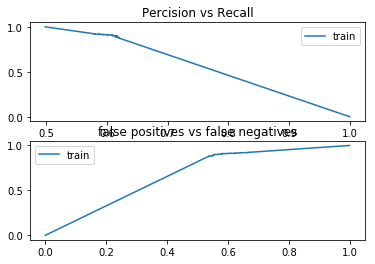

In [73]:
# Add your code here

pred_test_y=model.predict(np.array(x_test), batch_size=batch)
#outputing the classification report, accuracy and the confusion matrix of the validation dataset
print(classification_report(y_test,pred_test_y.round()))
print(confusion_matrix(y_test,pred_test_y.round()))
print(accuracy_score(y_test,pred_test_y.round()))

#find the percision, true positive rates, and false negative rates
p,r,_=precision_recall_curve(y_test,pred_test_y)
fpr, tpr, _=roc_curve(y_test,pred_test_y)

#plot the pervision vs recall
plt.figure()
plt.subplot(2, 1, 1)
plt.title('Percision vs Recall')
plt.plot(p,r, label='train')
plt.legend()

#plot the false positive rate vs true positive rate
plt.subplot(2, 1, 2)
plt.title('false positives vs false negatives')
plt.plot(fpr, tpr, label='train')
plt.legend()
plt.show()

### Exercise 6 

Plot the saliency map of original image to see which part is important for making classification decisions. You can refer to the following blog article on how to generate visualisation results of the filters in the ConvNets.
https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [ ]:
# Add your code here